In [1]:
# import necessary libraries and functions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing layers from keras
from keras.layers import Dense, InputLayer, BatchNormalization, Dropout, Conv2D, Flatten
import keras.layers as layers
from keras.models import Sequential

import tensorflow as tf
from tensorflow.keras import layers, models

# importing adam optimizer from keras optimizer module
from keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D

# train_test_split to create training and validation set
from sklearn.model_selection import train_test_split
# accuracy_score to calculate the accuracy of predictions
from sklearn.metrics import accuracy_score

from tensorflow.keras.callbacks import EarlyStopping
from PIL import Image

1. Created Train.csv and Test.csv
2. 
Renamed all the files as 
    TrainCov (n), 
    TrainNonCov (n),
    TestCov (n),
    TestNonCov (n)

    and created its label in csv

In [2]:
data = pd.read_csv('Train.csv') 

In [3]:
data.head()

,FileId,Label
0,TrainCov (1),1
1,TrainCov (2),1
2,TrainCov (3),1
3,TrainCov (4),1
4,TrainCov (5),1


In [4]:
# Since, file format for TrainCov and TrainNonCov are different, loading it in 2 parts.
# Also, all the images are of different channels like grey scale, 3 and 4 hence converting it to 3 channel.
# All the images are of different shapes, hence reshaping it to 224 X 224

X = []

for img in data[:90].FileId:
    image = Image.open('./Dataset/Train/'+img+'.png').convert("RGB")
    X.append(image.resize((224,224)))

for img in data[90:].FileId:
    image = Image.open('./Dataset/Train/'+img+'.jpg').convert("RGB")
    X.append(image.resize((224,224)))
    
X = np.array(X)
y = data.Label.values

In [5]:
X.shape

(180, 224, 224, 3)

In [6]:
# normalize the data between 0 and 1
X = X / X.max()

In [7]:
# Test Train Split
seed = 42
X_train, X_valid, y_train, y_valid=train_test_split(X,y,test_size=0.2, random_state=seed)

In [8]:
# Model Architecture
model = Sequential()

# Convolutional Block 1
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2, 2)))

# Convolutional Block 2
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))  # Dropout for regularization

# Convolutional Block 3
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))  # Dropout for regularization

# Flattening and Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.2))  # Dropout for regularization

# Output Layer
model.add(layers.Dense(1, activation='sigmoid'))  # 1 output neuron for binary classification

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

C:\Python\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,396,609 (169.36 MB)

 Trainable params: 44,396,609 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
early_stopping = EarlyStopping(monitor='val_loss',  # Can also be 'val_accuracy' depending on your needs
                               patience=7,  # Number of epochs with no improvement to wait before stopping
                               restore_best_weights=True) 

In [10]:
# Since, performance is better without early stopping, it is not being used. (Code is available in comments)
model_history = model.fit(X_train, y_train, epochs=15, batch_size=64,validation_data=(X_valid,y_valid)) #, callbacks=[early_stopping])

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4998 - loss: 2.5070 - val_accuracy: 0.5000 - val_loss: 2.0270
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5551 - loss: 1.2696 - val_accuracy: 0.5000 - val_loss: 0.9984
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.4915 - loss: 0.8847 - val_accuracy: 0.5000 - val_loss: 0.7431
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.5907 - loss: 0.7030 - val_accuracy: 0.5000 - val_loss: 0.7051
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.5295 - loss: 0.6772 - val_accuracy: 0.6389 - val_loss: 0.6568
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.6178 - loss: 0.6363 - val_accuracy: 0.6944 - val_loss: 0.5927
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.7342 - loss: 0.5637 - val_accuracy: 0.5833 - val_loss: 0.7314
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 10s 3s/step - accuracy: 0.6552 - loss: 0.6013 - val_accuracy: 0.6667 - val_loss: 0.5318
Epoch 9/15
3/

In [17]:
# Since, performance is better without early stopping, it is not being used. (Code is available in comments)
model_history = model.fit(X_train, y_train, epochs=1, batch_size=64,validation_data=(X_valid,y_valid)) #, callbacks=[early_stopping])

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.9759 - loss: 0.1412 - val_accuracy: 0.9167 - val_loss: 0.2197


In [18]:
# accuracy on validation set
print('Accuracy on validation set:', accuracy_score(y_valid, np.where(model.predict(X_valid)[:,0] < 0.5, 0,1)))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Accuracy on validation set: 0.9166666666666666


In [19]:
# Loading the Test data and performing all kinds of transformation which was done on train data as well
data1 = pd.read_csv('Test.csv')

X1 = []

for img in data1.FileId:
    image = Image.open('./Dataset/Test/'+img+'.png').convert("RGB")
    X1.append(image.resize((224,224)))
    
X1 = np.array(X1)

In [20]:
# Predicting the Test images
prediction = np.where(model.predict(X1)[:,0] < 0.5, 0,1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step


In [21]:
#Accuracy check for test images
print('Accuracy on validation set:', accuracy_score(data1.Label, np.where(model.predict(X1)[:,0] < 0.5, 0,1)))

5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 369ms/step
Accuracy on validation set: 0.42207792207792205


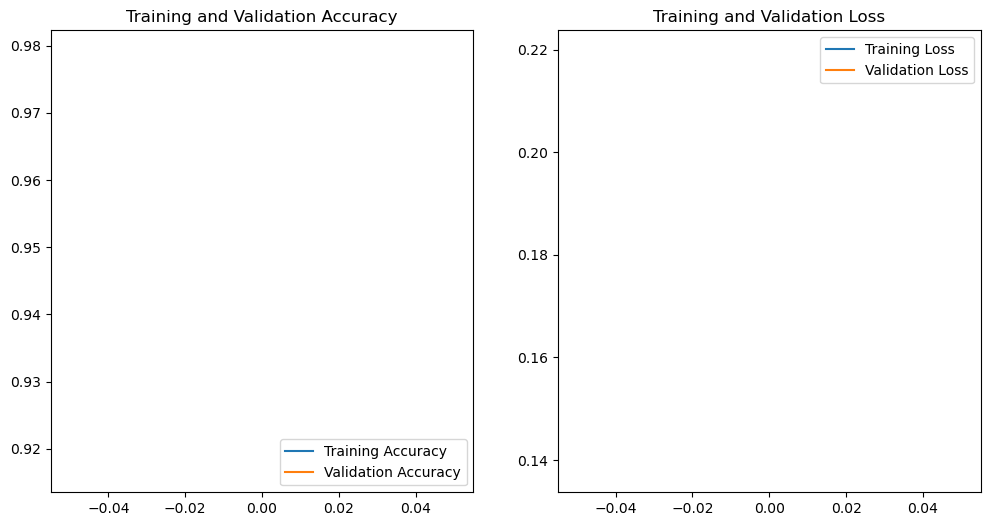

In [22]:

acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()